In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import GeoText module to parse locations in blocks of text
from geotext import GeoText

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload
%autoreload 2

pd.set_option('display.min_row', 25)
pd.set_option('display.max_colwidth', 300)

In [2]:
# Import Train Data
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
data.shape

(7613, 5)

# Keywords

In [6]:
# separate target values for plotting

target_1 = data[data['target'] == 1]
target_0 = data[data['target'] == 0]

In [7]:
data['keyword'].value_counts(dropna=False)

NaN                      61
fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
sinking                  41
body%20bags              41
fear                     40
collided                 40
twister                  40
evacuate                 40
                         ..
rubble                   28
volcano                  27
deluged                  27
battle                   26
bush%20fires             25
war%20zone               24
rescue                   22
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

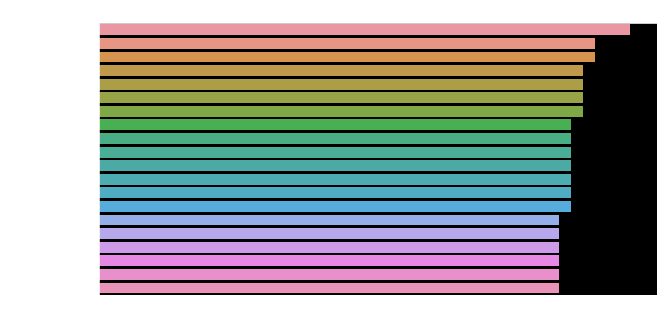

In [9]:
# top 20 keywords

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data['keyword'].value_counts()[:20], y=data['keyword'].value_counts().index[:20])
ax.set_title('Top 20 Keywords')
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Keywords');

# plt.savefig('images/top_20_keywords.png')

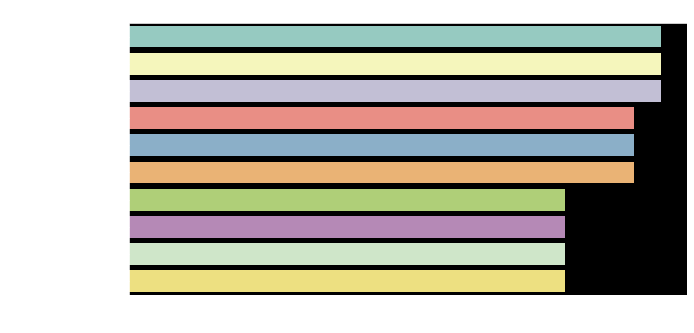

In [10]:
# top 10 key words of target 1

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=target_1['keyword'].value_counts()[:10], y=target_1['keyword'].value_counts().index[:10])
ax.set_title('Top 10 Keywords: Real')
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Keywords');

# plt.savefig('images/real_top10_keywords.png')

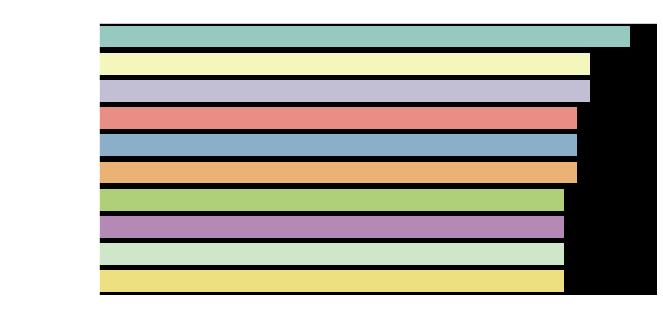

In [11]:
# top 20 key words of target 0

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=target_0['keyword'].value_counts()[:10], y=target_0['keyword'].value_counts().index[:10])
ax.set_title('Top 10 Keywords: Fake')
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Keywords');

# plt.savefig('images/fake_top10_keywords.png')

In [12]:
# check for missing keywords

data[data['keyword'].isna()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [13]:
data[data['text'].duplicated(keep=False)][['keyword', 'text', 'target']]

,keyword,text,target
40,ablaze,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
48,ablaze,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
106,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
115,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
118,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29,0
119,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29,0
147,airplane%20accident,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wednesday began examining t...,1
164,airplane%20accident,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wednesday began examining t...,1
610,bioterrorism,To fight bioterrorism sir.,1
624,bioterrorism,To fight bioterrorism sir.,0


Duplicated tweets could be coming from people retweeting the same articles.

# Location

In [14]:
data['location'].value_counts(dropna=False)

NaN                    2533
USA                     104
New York                 71
United States            50
London                   45
Canada                   29
Nigeria                  28
UK                       27
Los Angeles, CA          26
India                    24
Mumbai                   22
Washington, DC           21
                       ... 
Orange County, CA         1
Fountain Valley, CA       1
KLA,Uganda                1
Va Beach, Virginia        1
Your Six                  1
Yulee, FL                 1
Live Oak, TX              1
518 åá NY                 1
Jackson, MS               1
Anaheim                   1
Realville                 1
Ljubljana, Slovenia       1
Name: location, Length: 3342, dtype: int64

In [15]:
# def parse_country(text:str) -> dict:
#     try:
#         res = GeoText(text).country_mentions
#     except:
#         res = {}
#     return res

# data['country'] = data['text'].apply(parse_country)
# data['country_loc'] = data['location'].apply(parse_country)

In [16]:
data[data['location'].isnull()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [17]:
# Some has 2 key values for country because city name is in both
data[~data['location'].isnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
42,62,ablaze,milky way,Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??,0


# Character and Word Lengths

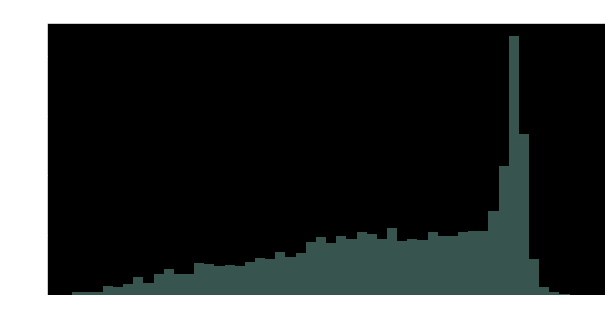

In [18]:
# distribution of number of characters in all tweet
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data['text'].str.len(), kde=False, bins=50)
ax.set_title('Distribution of Characters per Tweet')
ax.set_xlabel('Number of Characters')
ax.set_ylabel('Number of Tweets');

# plt.savefig('images/char_dist.png')

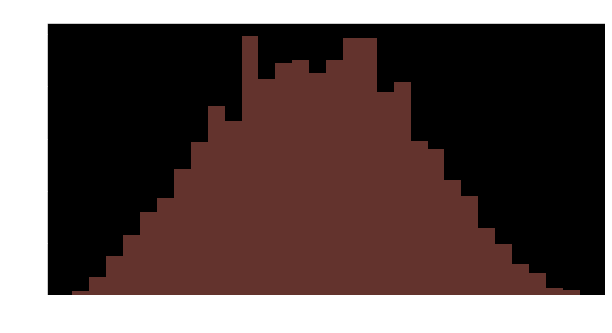

In [19]:
# distribution of number of words in all tweet
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data['text'].str.split().map(lambda x: len(x)), kde=False, bins=30, color='salmon')
ax.set_title('Distribution of Words per Tweet')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Number of Tweets');

# plt.savefig('images/word_dist.png')

Let's take a look at word lengths and character lengths based on whether the tweet is real or not.

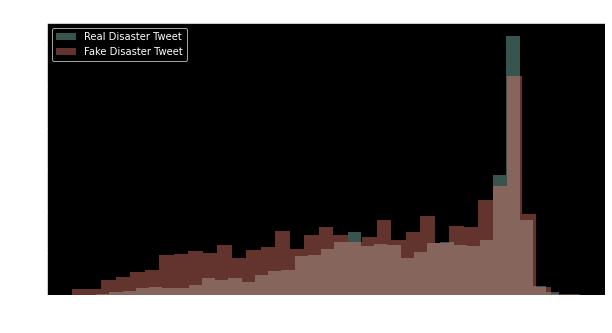

In [20]:
# distribution of number of characters in all tweet

fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(target_1['text'].str.len(), kde=False, bins=35, label='Real Disaster Tweet')
sns.distplot(target_0['text'].str.len(), kde=False, bins=35, color='salmon', label='Fake Disaster Tweet')
# target_1['text'].str.len().plot(kind='hist', bins=35, alpha=0.5, color='lightseagreen', label='Real Disaster Tweet')
# target_0['text'].str.len().plot(kind='hist', bins=35, alpha=0.5, color='crimson', label='Fake Disaster Tweet')
ax.set_title('Distribution of Characters: Real vs Fake')
ax.set_xlabel('Number of Characters')
ax.set_ylabel('Number of Tweets')
ax.legend();

# plt.savefig('images/compare_char_dist.png')

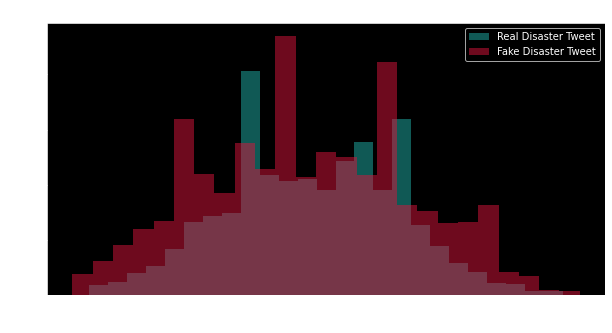

In [21]:
# distribution of number of characters in all tweet

fig, ax = plt.subplots(figsize=(10,5))

target_1['text'].str.split().map(lambda x: len(x)).plot(kind='hist', bins=25, alpha=0.5, color='lightseagreen', label='Real Disaster Tweet')
target_0['text'].str.split().map(lambda x: len(x)).plot(kind='hist', bins=25, alpha=0.5, color='crimson', label='Fake Disaster Tweet')
ax.set_title('Distribution of Words: Real vs Fake')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Number of Tweets')
ax.legend();

# plt.savefig('images/compare_word_dist.png')

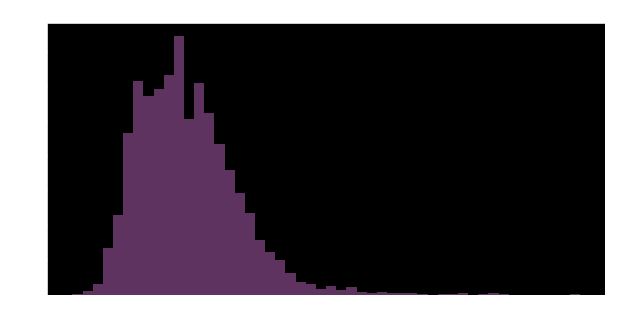

In [22]:
# Average word length in each sentence
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data['text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)), bins=50, kde=False, color='violet')
ax.set_title('Average Word Length per Tweet')
ax.set_xlabel('Average Word Length')
ax.set_ylabel('Number of Tweets');

# plt.savefig('images/avg_word_len.png')

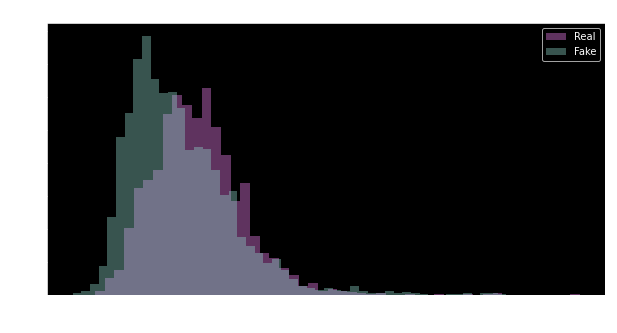

In [23]:
# Average word length in each sentence: real vs fake
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(target_1['text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)), bins=50, color='violet', label='Real', kde=False)
sns.distplot(target_0['text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)), bins=50, label='Fake', kde=False)
ax.set_title('Average Word Length per Tweet: Real vs Fake')
ax.set_xlabel('Average Word Length')
ax.set_ylabel('Number of Tweets')
ax.legend();

# plt.savefig('images/compare_avg_word_len.png')

It seems like fake disaster tweets tend to have shorter words per tweet.

NLP Workflow:

1. tokenize
2. lowercase
3. filter stopwords and punctuations
4. stemming/lemmatization
5. optional approaches: ngrams, POS tagging
6. tf-idf
7. cosine similarity

nltk: good for learning  
spaCY: better for production